# Project Name - Online Retail Customer Segmentation

# Project Type - Unsupervised Machine Learning

# Contribution - Individual

# Name - Tushar Raskar

# GitHub Link

https://github.com/tusharraskar/Online-Retail-Customer-Segmentation.git

# Problem Statement

### Business Problem Overview

Online retail businesses face the challenge of understanding their customer base in order to effectively target their marketing efforts and improve customer satisfaction. 

Customer segmentation is a process of dividing customers into groups based on shared characteristics such as demographics, purchasing behavior, and online behavior. 

The goal of online retail customer segmentation is to gain insights into customer needs and preferences, and to develop targeted marketing strategies that address the unique needs and behaviors of each segment. 

This can help increase customer loyalty, improve sales, and drive growth for the business.

### Business Objective

The objective of online retail customer segmentation is to identify and understand different customer segments and their unique needs, behaviors, and preferences. 

This allows the business to tailor their marketing and sales strategies to each segment, increase customer satisfaction, and ultimately increase customer loyalty and revenue. 

The ultimate goal is to provide a personalized experience for each customer, resulting in increased brand loyalty and long-term customer engagement.

### Feature Description 

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Import Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Dataset Loading
data = pd.read_csv('Online Retail.csv')

In [3]:
# Viewing data's first 5 row

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Chicking shape of data

data.shape

(541909, 8)

#### Data has 541909 rows and 8 columns.

In [5]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# Checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Ckechking null or missing values

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### In our data there is null valuse in
1. Description = 1454
2. CustomerID = 135080

Customer ID is our Identification feature and Description has Product description.

We cannot do Clustering without Customer ID values.

## Checking unique values in each feature

In [8]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## Data Describe

In [9]:
# Creating copy of the current data and assigning to df
df=data.copy()

In [10]:
df.dropna(subset=['CustomerID'],inplace=True) 

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
data.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Text(0.5, 0, 'Quantity')

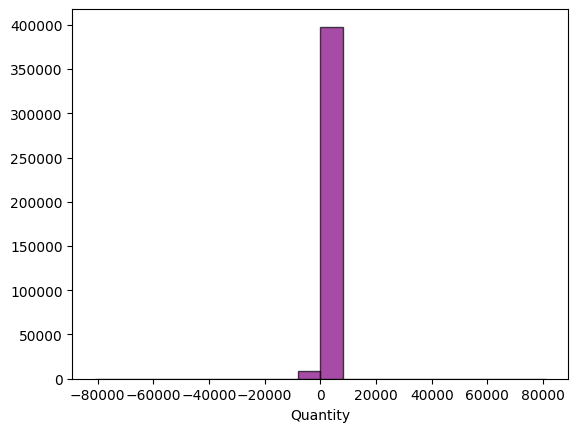

In [13]:
# Checking distrubution of Quantity

plt.hist(df['Quantity'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Quantity')


Customer ID is our Identification feature and Description has Product description.

We cannot do Clustering without Customer ID values.

Hence, droppingg the missing values

In [14]:
# removing data which hnave negetive values
df=df[df['Quantity']>0]

In [15]:
# Checking data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [16]:
df.shape

(397924, 8)

### Our data got reduced now we have 397924 datapoints

# Feature Engineering

In [17]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 12/1/10 8:26.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format='%m/%d/%y %H:%M')

In [18]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [19]:
# extracting month from the Invoice date
df['Month']=df['InvoiceDate'].dt.month_name()

In [20]:
# extracting day from the Invoice date
df['Day']=df['InvoiceDate'].dt.day_name()

In [21]:
# Making total amount column by multiplying quantity with price
df['TotalAmount']=df['Quantity']*df['UnitPrice'] 

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


# Exploratory Data Analysis

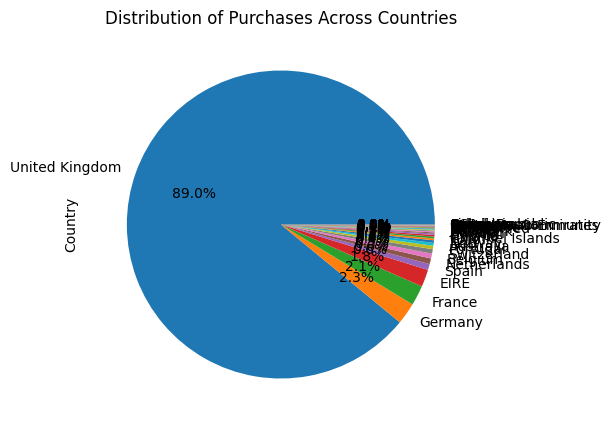

In [23]:
# Plot 6: Pie chart of distribution of purchases across countries
df['Country'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,5))
plt.title('Distribution of Purchases Across Countries')
plt.show()

# Exploring StockCode feature - Univariate and Bivariate analysis

In [24]:
# Checking the number of unique StockCodes
print("Number of unique StockCodes: ", len(data.StockCode.unique()))

Number of unique StockCodes:  4070


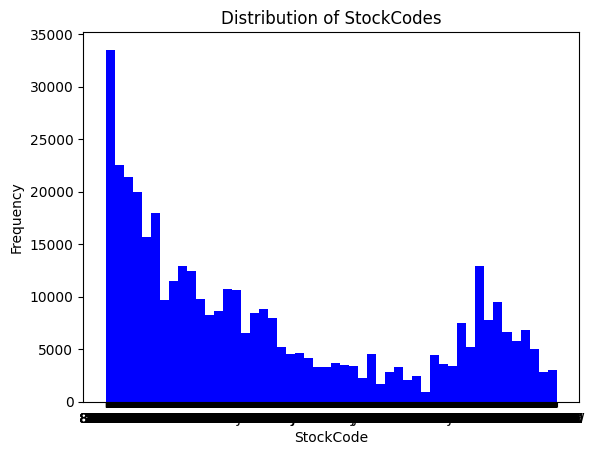

In [25]:
# Plotting the distribution of StockCodes
plt.hist(df.StockCode, bins = 50, color = 'blue')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Distribution of StockCodes')
plt.show()

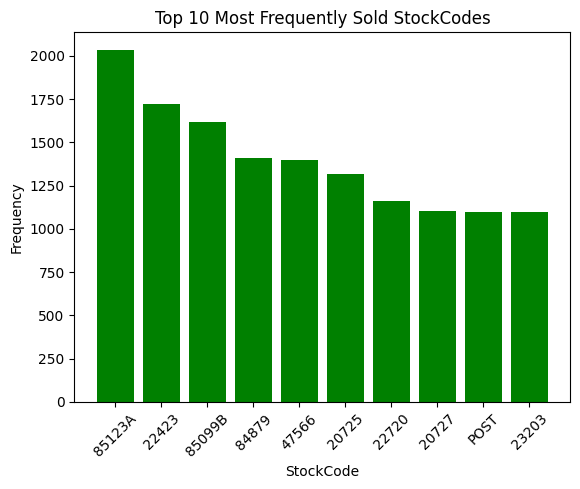

In [26]:
# Plotting the top 10 most frequently sold StockCodes
top_10 = df.StockCode.value_counts().head(10)
plt.bar(top_10.index, top_10.values, color = 'green')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequently Sold StockCodes')
plt.xticks(rotation = 45)
plt.show()

In [27]:
df.StockCode.value_counts().head(10)

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
20725     1317
22720     1159
20727     1105
POST      1099
23203     1098
Name: StockCode, dtype: int64

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the analysis of the most frequently sold StockCode in the online retail business are:

The most frequently sold product is StockCode 85123A with 2035 sales, followed by StockCode 22423 with 1724 sales.

The top 10 most frequently sold StockCode represents a significant proportion of the overall sales, accounting for more than 10,000 sales in total.

The products with StockCode 85099B, 84879, 47566, and 20725 are also among the top-selling products, indicating a strong demand for these specific items.

The StockCode POST represents a significant number of sales, which could indicate the popularity of postage and delivery services among the customers.

The data also suggests that there is a mix of unique products (represented by different StockCodes) as well as repeat purchases of the same items, indicating customer loyalty and repeat business.

##### 3. Will the gained insights help creating a positive business impact?   

Yes, the gained insights from the analysis of the most frequently sold StockCode can help create a positive business impact. 

The information on the top-selling products can be used by the business to make strategic decisions such as stocking more of the popular items and improving marketing efforts for those specific products. 

By understanding the demands and preferences of customers, the business can better tailor its offerings and improve its overall revenue and profits.

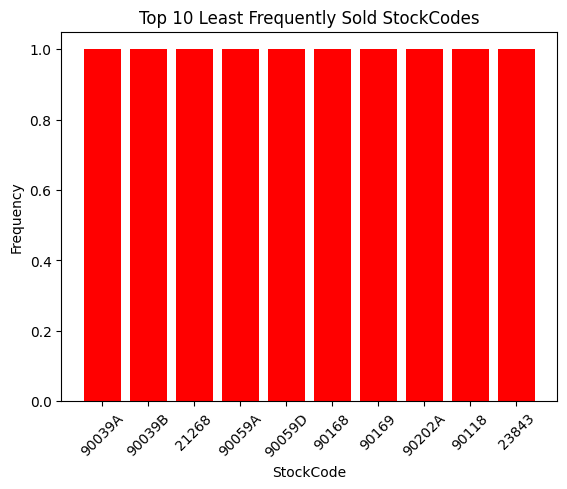

In [28]:
# Plotting the top 10 least frequently sold StockCodes
top_10 = df.StockCode.value_counts().tail(10)
plt.bar(top_10.index, top_10.values, color = 'red')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Top 10 Least Frequently Sold StockCodes')
plt.xticks(rotation = 45)
plt.show()

In [29]:
df.StockCode.value_counts().tail(10)

90039A    1
90039B    1
21268     1
90059A    1
90059D    1
90168     1
90169     1
90202A    1
90118     1
23843     1
Name: StockCode, dtype: int64

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

The top 10 least frequently sold StockCodes are all sold only once. 

This could indicate low demand for these products, which could lead to insights such as the need for marketing efforts to increase demand, or discontinuing the production of these items. 

##### 3. Will the gained insights help creating a positive business impact?   

Yes, The insight that the interested response rate for males is higher (13.84%) than for females (10.39%) could be used to inform the company's marketing efforts.

# Exploring Description feature - Univariate and Bivariate analysis

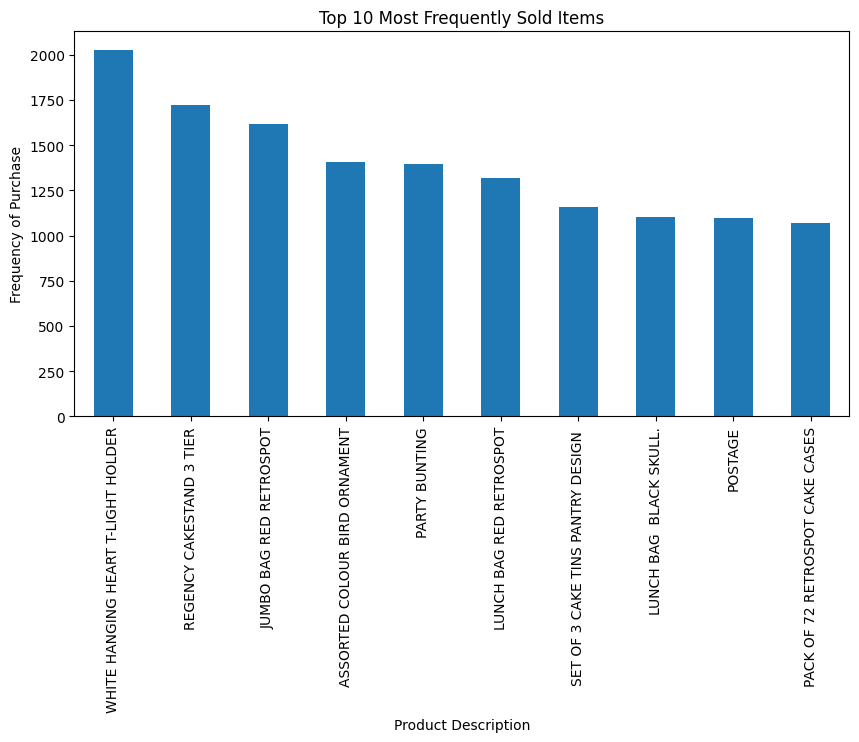

In [30]:
# Bar plot of the top 10 most frequently sold items
df['Description'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.xlabel('Product Description')
plt.ylabel('Frequency of Purchase')
plt.title('Top 10 Most Frequently Sold Items')
plt.show()

In [31]:
df['Description'].value_counts().nlargest(10)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: Description, dtype: int64

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

The majority of the top 10 most frequently sold items are home decor items, such as hanging T-light holders, cake stands, and bird ornaments. This suggests that customers are likely buying these items for their homes.

The items sold are mainly in red or black colors and feature retrospot designs. This suggests that customers are drawn to these colors and designs for home decor items.

There is also a high demand for party-related items, such as bunting and cake tins. This indicates that customers are interested in hosting parties and events.

The high demand for lunch bags suggests that customers are interested in purchasing practical, reusable products for daily use.

There is also a demand for postage services, indicating that customers are purchasing items from this online retail store for delivery to other locations.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights from the customer segmentation can help create a positive business impact. 

By understanding the top 10 most frequently sold items, the online retail store can focus on promoting and stocking these items to attract more customers who are interested in home decor, party items, and practical, reusable products. This could increase sales and customer satisfaction.

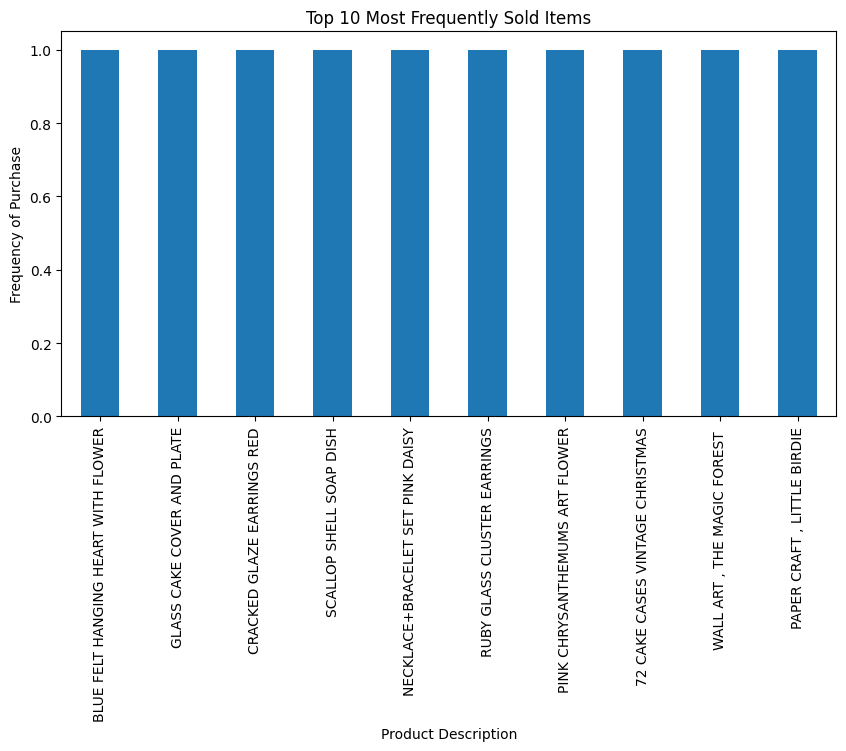

In [32]:
# Bar plot of the top 10 least frequently sold items
df['Description'].value_counts().tail(10).plot(kind='bar', figsize=(10,5))
plt.xlabel('Product Description')
plt.ylabel('Frequency of Purchase')
plt.title('Top 10 Most Frequently Sold Items')
plt.show() 

In [33]:
df['Description'].value_counts().tail(10)

BLUE FELT HANGING HEART WITH FLOWER    1
GLASS CAKE COVER AND PLATE             1
CRACKED GLAZE EARRINGS RED             1
SCALLOP SHELL SOAP DISH                1
NECKLACE+BRACELET SET PINK DAISY       1
RUBY GLASS CLUSTER EARRINGS            1
PINK CHRYSANTHEMUMS ART FLOWER         1
72 CAKE CASES VINTAGE CHRISTMAS        1
WALL ART , THE MAGIC FOREST            1
PAPER CRAFT , LITTLE BIRDIE            1
Name: Description, dtype: int64

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

Based on the data of the top 10 least frequently sold items, it can be concluded that these items are not in high demand among customers. This information can be used by retailers to optimize their inventory and reduce their stock of these items.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights from the top 10 least frequently sold items can help create a positive business impact for the retailer. By reducing the stock of these items, the retailer can save money on inventory costs, reduce storage space, and optimize their resources to focus on more popular and in-demand items. 

# Exploring Quantity feature -  Bivariate analysis

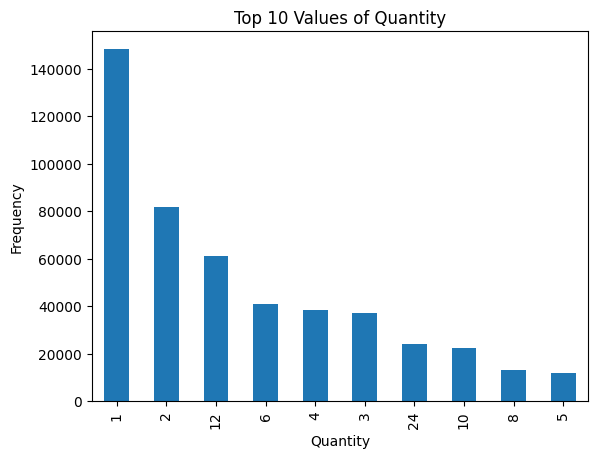

In [34]:
# Plot the top 10 values of the 'Quantity' feature
top_10_quantity = data['Quantity'].value_counts().head(10)
top_10_quantity.plot(kind='bar')
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Top 10 Values of Quantity")
plt.show()

In [35]:
top_10_quantity

1     148227
2      81829
12     61063
6      40868
4      38484
3      37121
24     24021
10     22288
8      13129
5      11757
Name: Quantity, dtype: int64

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

From the top 10 values of the 'Quantity' feature, it can be seen that the majority of the transactions involve small quantities of a single item, with the most frequent quantity being 1. 

The second most frequent quantity is 2, followed by 12 and 6. There is a gradual decrease in frequency as the quantity increases. 

The highest quantity in the top 10 values is 24, which is still relatively low. This indicates that most of the transactions in the dataset involve small quantities of a single item, rather than large quantities of multiple items.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights from the 'Quantity' feature can help create a positive business impact. By understanding the quantity of products that customers typically purchase, the business can tailor their marketing and sales strategies to better meet the needs of their customers.

# Exploring UnitPrice feature -  Univariate and Bivariate analysis

In [36]:
# Mean and median
print('Mean of UnitPrice',df['UnitPrice'].mean())
print('Median of UnitPrice',df['UnitPrice'].median()) 

Mean of UnitPrice 3.1161744805540756
Median of UnitPrice 1.95


C:\Users\Tushar\AppData\Local\Temp\ipykernel_25672\591983619.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['UnitPrice'], shade=True)
C:\Users\Tushar\AppData\Local\Temp\ipykernel_25672\591983619.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Quantity'] > 0]['UnitPrice'], shade=True)


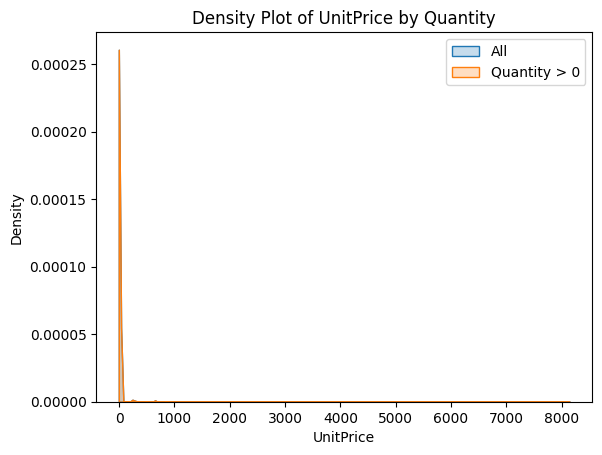

In [37]:
# Plot a density plot of UnitPrice by Quantity
sns.kdeplot(df['UnitPrice'], shade=True)
sns.kdeplot(df[df['Quantity'] > 0]['UnitPrice'], shade=True)
plt.title("Density Plot of UnitPrice by Quantity")
plt.xlabel("UnitPrice")
plt.ylabel("Density")
plt.legend(['All', 'Quantity > 0'])
plt.show()

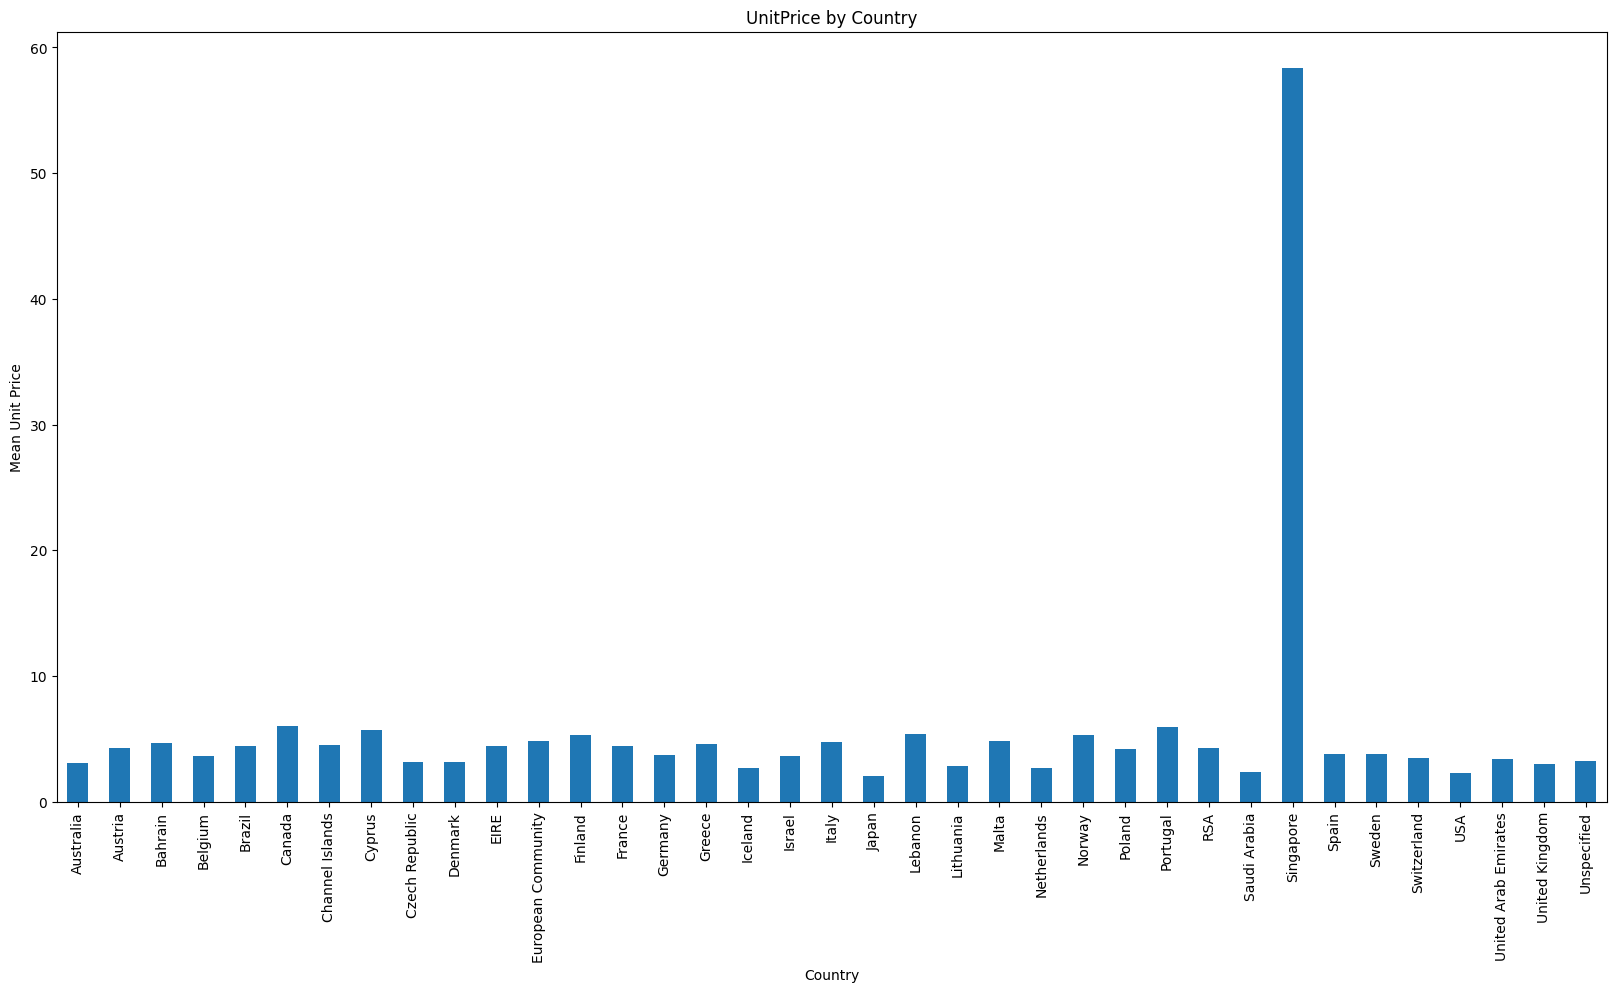

In [38]:
# Group the data by country and calculate the mean of unit price for each country
grouped = df.groupby(['Country'])['UnitPrice'].mean()

# Plot the barplot of UnitPrice by Country
grouped.plot(kind='bar', figsize=(20,10))
plt.xlabel('Country')
plt.ylabel('Mean Unit Price')
plt.title('UnitPrice by Country')
plt.show()

In [39]:
grouped

Country
Australia                3.048523
Austria                  4.256030
Bahrain                  4.644118
Belgium                  3.630158
Brazil                   4.456250
Canada                   6.030331
Channel Islands          4.531618
Cyprus                   5.710391
Czech Republic           3.130800
Denmark                  3.146184
EIRE                     4.445880
European Community       4.830000
Finland                  5.296993
France                   4.415253
Germany                  3.708487
Greece                   4.574414
Iceland                  2.644011
Israel                   3.646935
Italy                    4.717955
Japan                    2.047383
Lebanon                  5.387556
Lithuania                2.841143
Malta                    4.867768
Netherlands              2.643982
Norway                   5.282155
Poland                   4.173364
Portugal                 5.925472
RSA                      4.277586
Saudi Arabia             2.351111
Singap

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

Singapore has the highest average unit price of 58.333288, which indicates that customers in Singapore tend to purchase more expensive products compared to other countries.

USA has an average unit price of 2.308939, which is relatively low compared to other countries.

European countries such as France, Germany, and Belgium tend to have an average unit price between 3.63 to 4.83, which is higher than some countries but lower than others.

Scandinavian countries such as Norway, Sweden, and Denmark also tend to have a relatively high average unit price compared to other countries.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact by providing a deeper understanding of the purchasing behavior of customers in different countries.

# Exploring CustomerID feature -  Univariate and Bivariate analysis

C:\Users\Tushar\AppData\Local\Temp\ipykernel_25672\3137206398.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CustomerID'], kde=False)


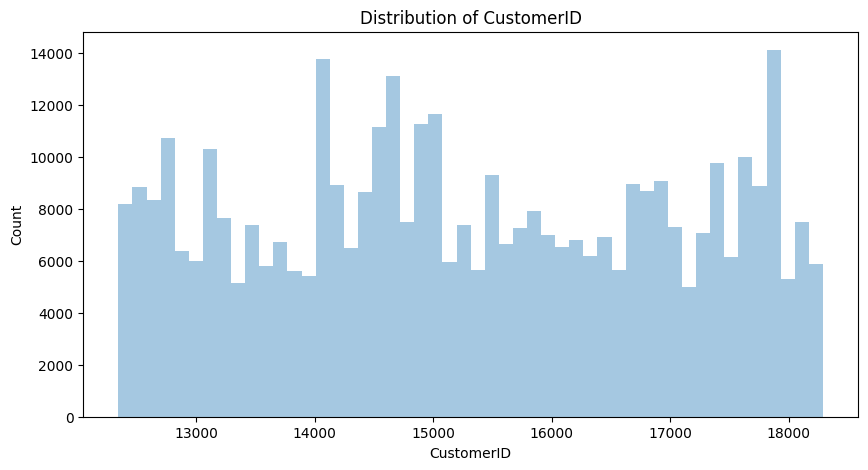

In [40]:
# Plot the distribution of CustomerID
plt.figure(figsize=(10,5))
sns.distplot(df['CustomerID'], kde=False)
plt.title("Distribution of CustomerID")
plt.xlabel("CustomerID")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Top 10 frequent Customers.')

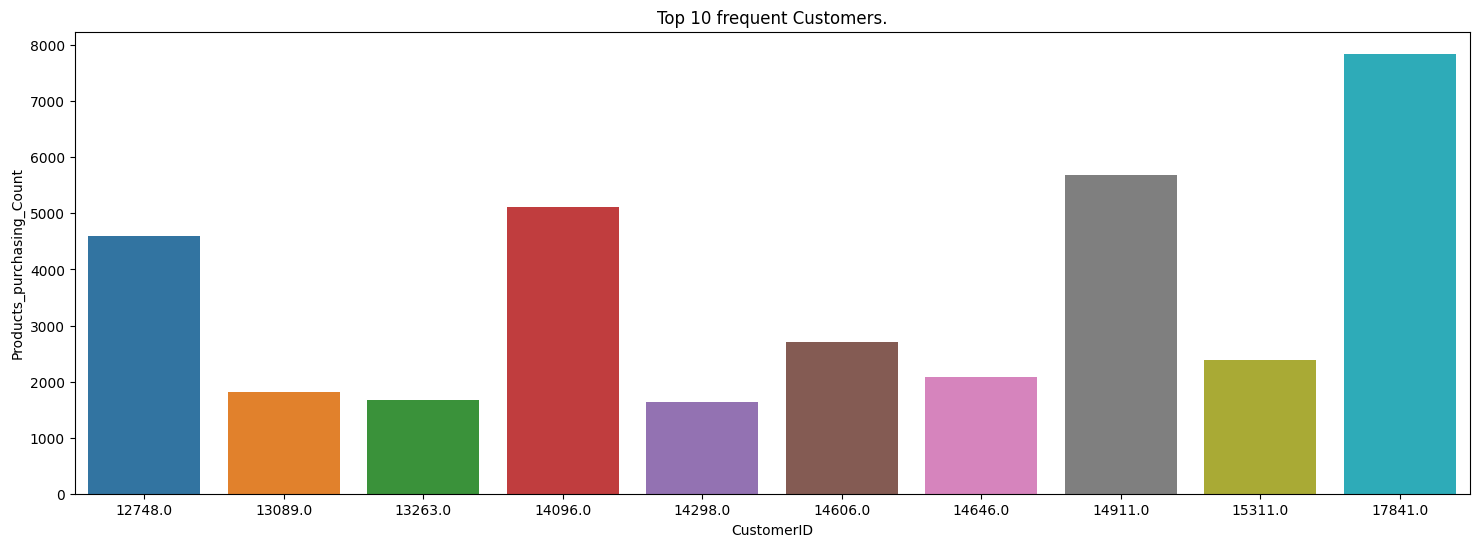

In [41]:
# Top 10 frequent Customers
top_10_customers=df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)

# Top 10 frequent Customers
plt.figure(figsize=(18,6))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

In [42]:
customer_group = df.groupby(by='CustomerID').sum()['Quantity']
top_10 = customer_group.sort_values(ascending=False).head(10)
top_10 

C:\Users\Tushar\AppData\Local\Temp\ipykernel_25672\1772976015.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_group = df.groupby(by='CustomerID').sum()['Quantity']


CustomerID
14646.0    197491
16446.0     80997
14911.0     80515
12415.0     77670
12346.0     74215
17450.0     69993
17511.0     64549
18102.0     64124
13694.0     63312
14298.0     58343
Name: Quantity, dtype: int64

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

The insight found from the top 10 frequent customers is that they are the most active customers in terms of purchasing products. 

CustomerID 14646 has the highest purchasing count of 197491, which indicates that they are the most frequent buyer among the top 10 customers. 

This information can help the retail company to understand the customer behavior and target these customers with promotional offers and discounts to increase their loyalty.

3. Will the gained insights help creating a positive business impact?

Yes, the customer segmentation based on purchasing behavior can provide valuable insights for the retail company to improve its marketing strategies, increase customer satisfaction and sales, and ultimately drive its business growth.

# Exploring CustomerID feature -  Univariate and Bivariate analysis

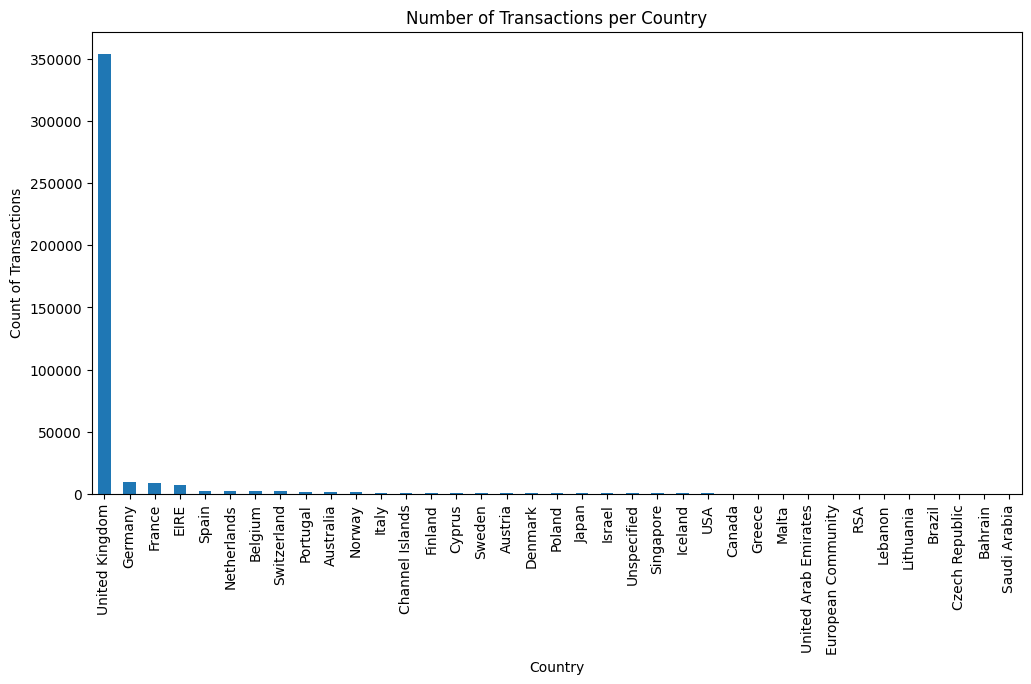

In [43]:
# Bar Plot of the count of transactions per country
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot(kind='bar')
plt.title('Number of Transactions per Country')
plt.xlabel('Country')
plt.ylabel('Count of Transactions')
plt.show()

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

The majority of the transactions are from the United Kingdom (354345 transactions), while the least number of transactions is from Saudi Arabia (9 transactions).

There are a total of 21 countries represented in the data, with the top five countries accounting for the majority of the transactions.

The data shows a distribution of transactions among countries, which could indicate potential market opportunities for expanding the business in underrepresented countries.

The data could also be used to identify customer preferences and tailor marketing strategies based on the country of residence.

3. Will the gained insights help creating a positive business impact?

Yes, the insights gained from the data on customer transactions and country of residence could potentially have a positive business impact. By understanding the distribution of transactions among different countries, the company can focus their resources on expanding their business in underrepresented countries to tap into new market opportunities.

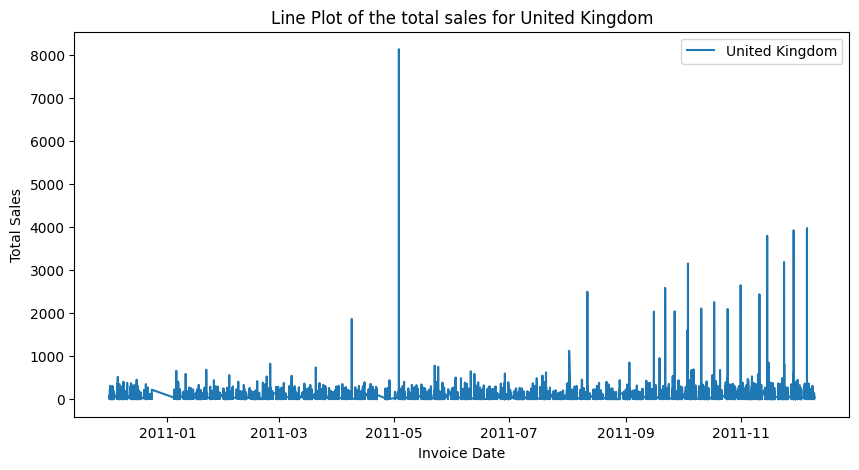

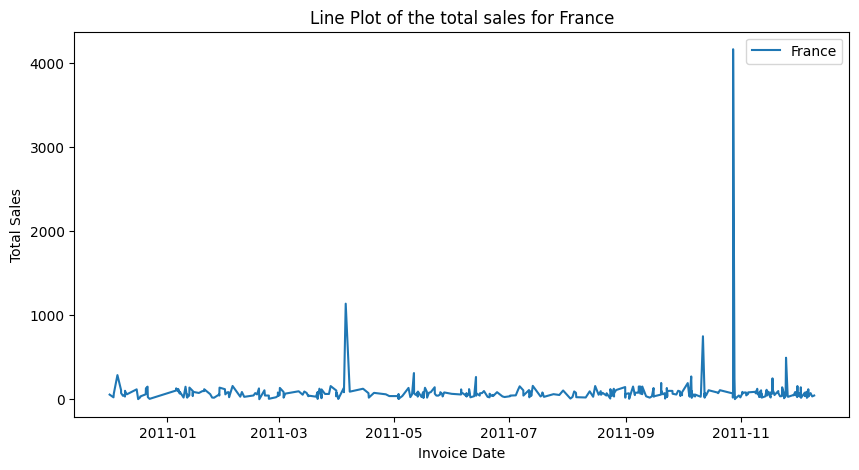

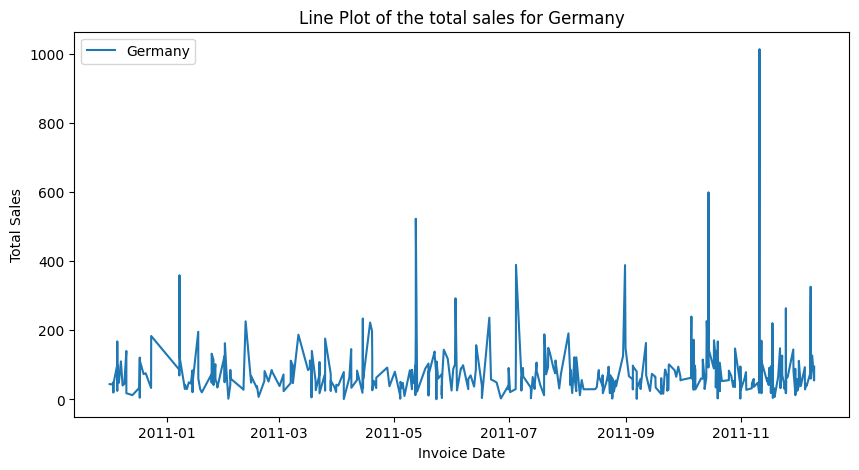

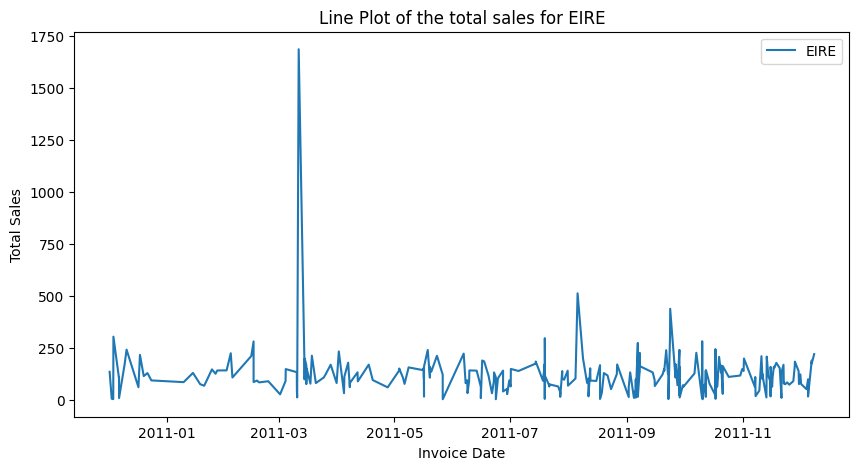

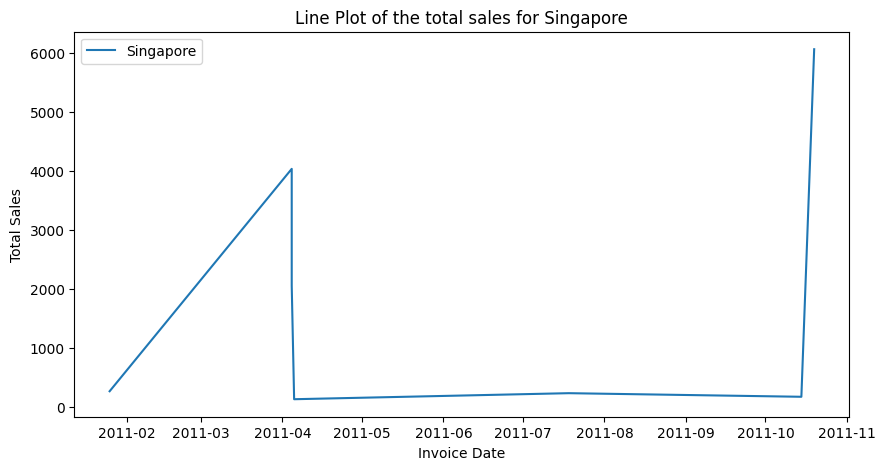

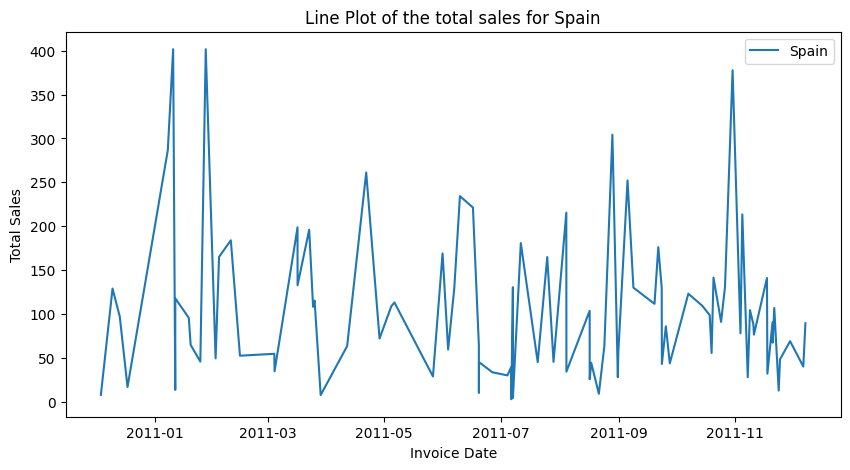

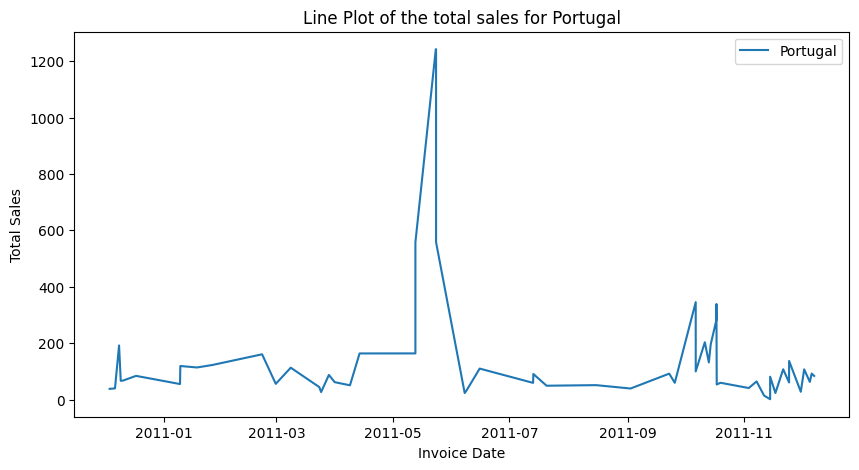

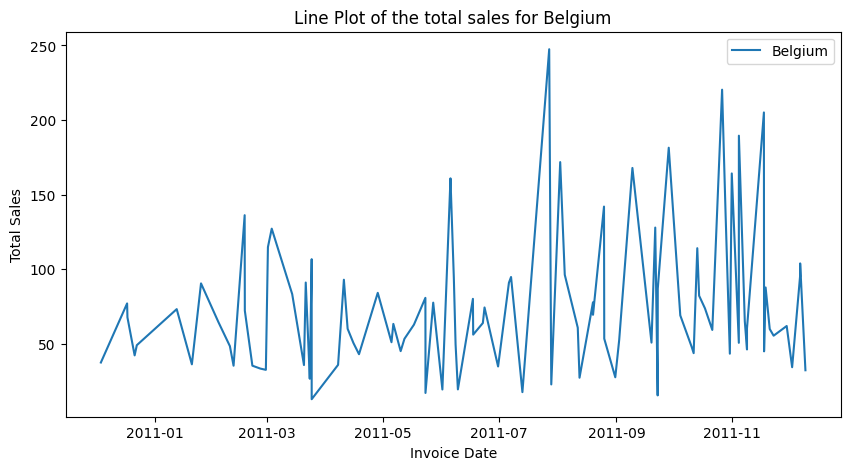

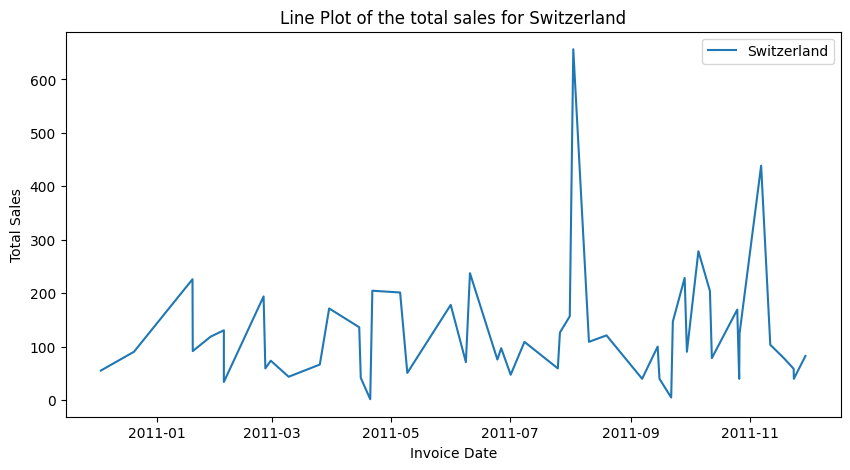

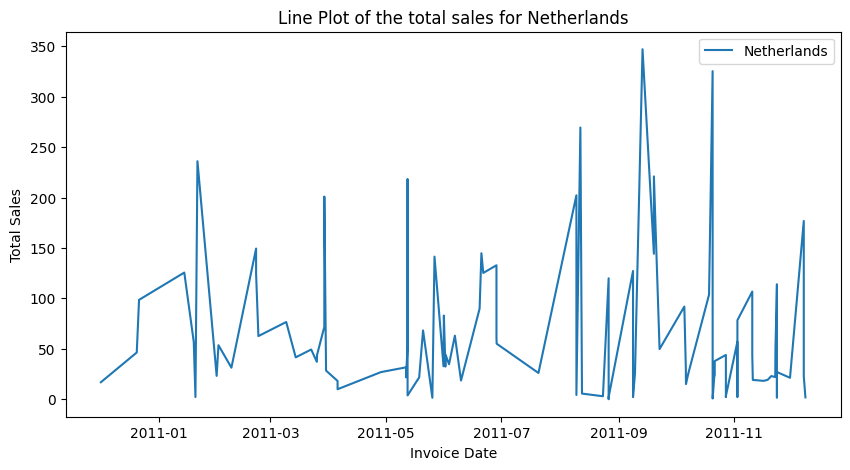

In [44]:
# Aggregate the total sales by country
df_country_sales = df.groupby(["Country"])["UnitPrice"].sum().reset_index()

# Sort by total sales and get the top 10 countries
df_country_sales = df_country_sales.sort_values("UnitPrice", ascending=False).head(10)

# Get a list of the top 10 countries
top_10_countries = df_country_sales["Country"].tolist()

# Create a new dataframe with only the top 10 countries
df_top_10 = df[df["Country"].isin(top_10_countries)]

# Aggregate the sales data by country and date
df_top_10_date_sales = df_top_10.groupby(["Country", "InvoiceDate"])["UnitPrice"].sum().reset_index()

# Convert the InvoiceDate to a datetime object
df_top_10_date_sales["InvoiceDate"] = pd.to_datetime(df_top_10_date_sales["InvoiceDate"])

# Plot a separate plot for each top 10 country
for country in top_10_countries:
    df_country = df_top_10_date_sales[df_top_10_date_sales["Country"] == country]
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df_country["InvoiceDate"], df_country["UnitPrice"], label=country)
    ax.legend()
    ax.set_xlabel("Invoice Date")
    ax.set_ylabel("Total Sales")
    ax.set_title(f"Line Plot of the total sales for {country}")
    plt.show()



Text(0.5, 1.0, 'Top 5 Countries based on highest number of customers')

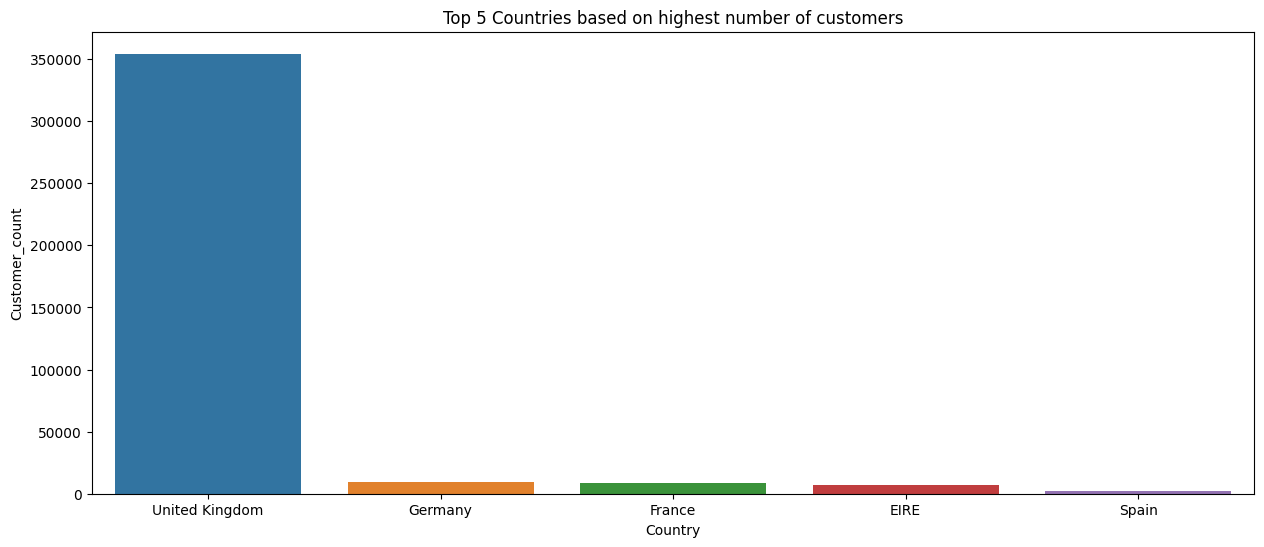

In [46]:
# top 5 countries where max sell happens.
top_5_countries=df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers') 

In [47]:
top_5_countries[:10]

,Country,Customer_count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1462
9,Australia,1185


1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

United Kingdom has the highest number of customers with 354345, which means that the maximum sales happen in this country.

The top 10 countries that contribute to the maximum sales are United Kingdom, Germany, France, EIRE, Spain, Netherlands, Belgium, Switzerland, Portugal, and Australia.

The rest of the countries have a relatively smaller customer count and contribute to a lesser extent to the overall sales

3. Will the gained insights help creating a positive business impact?

This information can be used by the company to prioritize their marketing efforts in the countries that have a higher customer count and contribute significantly to the sales.

The company can also focus on improving their product offerings in these countries to increase their sales and attract more customers.

Understanding the customer base in different countries can also help the company to make informed decisions about pricing, promotions, and product offerings.

Text(0.5, 1.0, 'Sales count in different Months ')

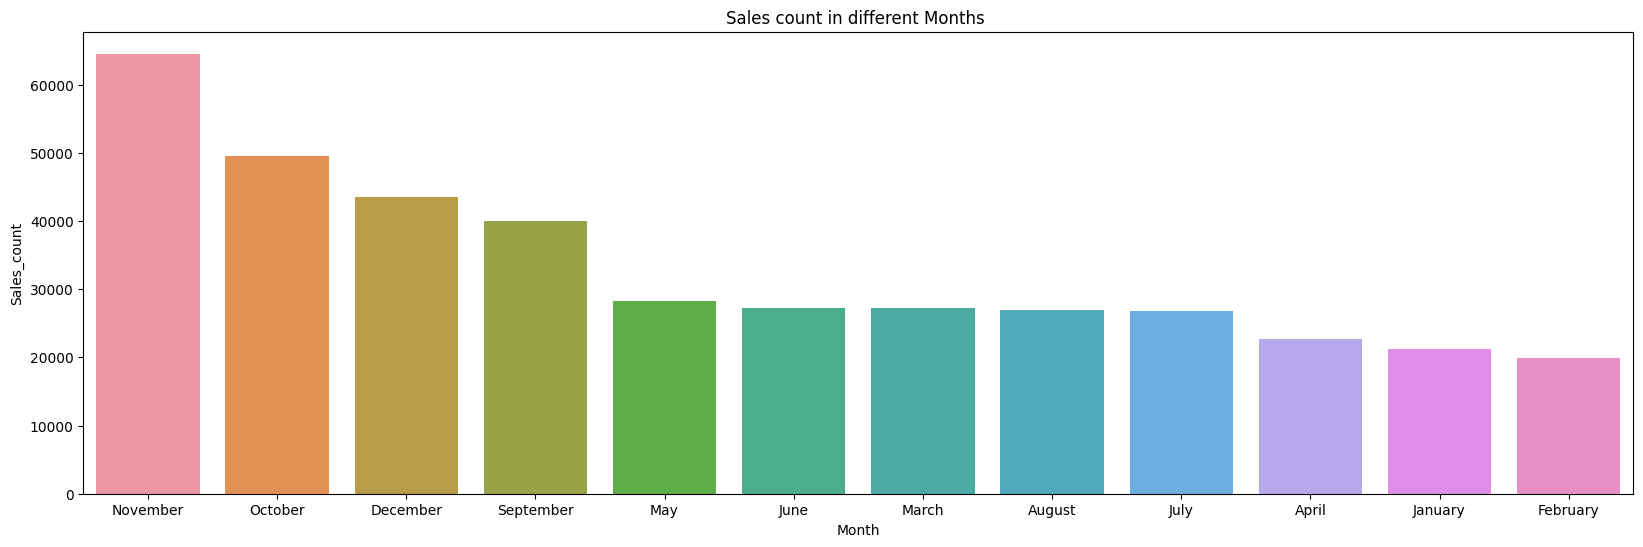

In [48]:
# Sales count in different months.

sales_in_month=df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ') 

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

November is the month with the highest sales count with 64531 transactions.

January has the lowest sales count with 21229 transactions.

There is a fluctuation in the sales count between months, with the highest sales count in November and the lowest in January.

The sales count shows a peak in the months of November and December, which may indicate an increase in holiday season shopping.

The months of May, June, and September also show relatively higher sales counts, indicating a potential increase in sales

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights from the sales count in different months can help create a positive business impact. 

By understanding the trend in sales, the company can make informed decisions on product inventory and promotional strategies during high sales periods. 

Identifying the peak months for sales can help the company allocate resources and staff accordingly to meet customer demand. 

This information can also help the company predict future sales trends and plan accordingly.

In [45]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

In [52]:
# Sales count in different days.
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


<AxesSubplot: title={'center': 'Day'}, xlabel='Day_Name', ylabel='Count'>

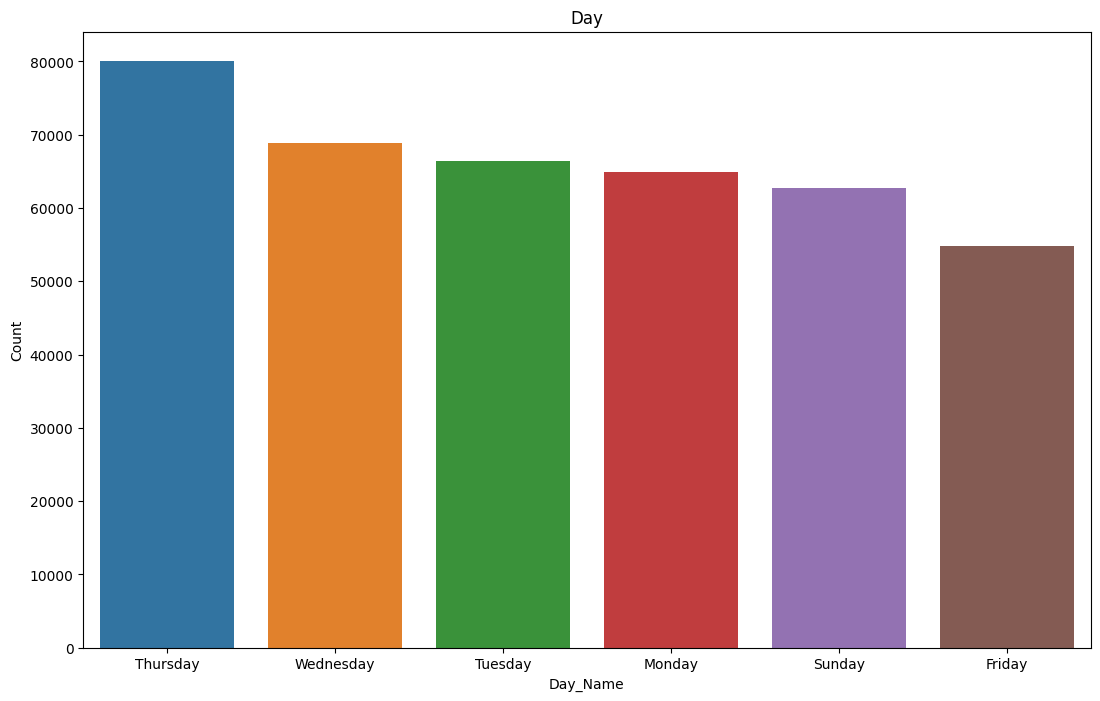

In [53]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

Based on the sales count in different days, the following insights can be found:

Thursday has the highest sales count of 80052, followed by Wednesday with 68888 sales.

The sales count decreases as the days go from Thursday to Sunday, with Sunday having the lowest sales count of 62775.

Monday and Tuesday have similar sales counts with 64899 and 66476 respectively.

Friday has the lowest sales count among the weekdays with 54834 sales.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact by allowing the company to better understand customer purchasing patterns and make informed decisions on how to allocate resources and promotions. 

In [54]:
# Sales count in different hours.
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


<AxesSubplot: title={'center': 'Hour'}, xlabel='Hour_Name', ylabel='Count'>

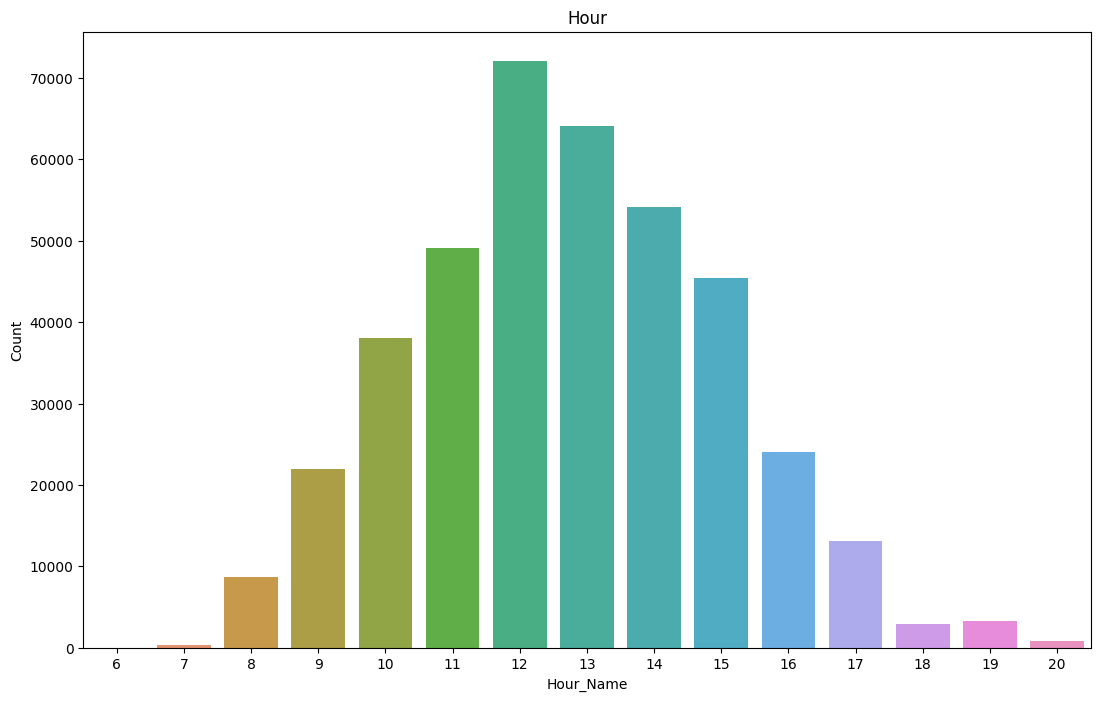

In [55]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

2. What is/are the insight(s) found from the chart?

The highest sales count is during the hours of 12 and 13 with 72069 and 64031 counts respectively.

The lowest sales count is during the hours of 6 and 7 with only 1 and 379 counts respectively.

There is a declining trend in sales as the day progresses with a drop in sales count from 12 to 18.

The hours of 8, 9 and 20 have a much lower sales count compared to other hours, which could indicate a slow period for sales during those times.

The data suggests that the peak sales period is between 11am and 2pm, with a drop in sales from 3pm onwards.

3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact by allowing retailers to optimize their resources and sales strategies during peak sales hours. 

They can also target customers during off-peak hours by offering special promotions or discounts to increase sales during those times.